# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. If you want to familiarize yourself with the package beforehand, visit https://github.com/maxwellmb/pyMuellerMat/

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

# Step 1: Write FITS Info to CSV

In [2]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [6]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_no_pickoff = df.iloc[72:].reset_index(drop=True)
    df_with_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [4]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin 15 here, I would recommend using a bin in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin15_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-5.22213279e-01  4.02450338e+08 -3.91877275e-01  4.00912593e+08
 -2.46134292e-02  3.98605969e+08  3.77378452e-01  3.98571117e+08
  5.86235703e-01  4.00370202e+08]
Interleaved Stds
Length:  144
[4.25107378e-05 2.00611649e+04 4.59484896e-05 2.00228018e+04
 5.00721811e-05 1.99651188e+04 4.63858804e-05 1.99642460e+04
 4.04882954e-05 2.00092529e+04]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [2]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


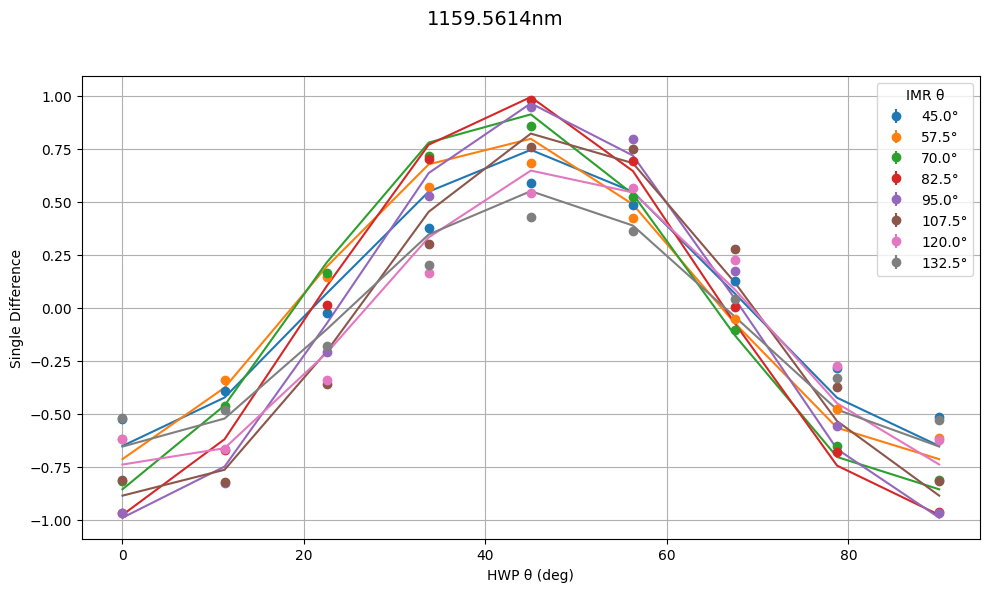

Residuals range: -0.17031000988755746 0.17747719067035173


In [6]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[15], IMR_retardance(wavelength_bins)[15]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')

# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

NOTE: I am only fitting for the retardances and lp diattenuation here, not the offsets, to preserve correct errors. Previously, I did this same fitting procedure including the offsets, and their values were extremeley consistent across wavelength bins (std ~10^-13). I fixed these averages for the offset angles. For unknown reasons, when I did that first fit the errors were nonsensical for the offsets. 

     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.174e+03  3.957e+02 ... -1.803e+03 -1.144e+03]
           x: [ 9.474e-01  5.000e-02  3.033e+00 -5.000e-02  9.795e-01
                5.000e-02]
        cost: 84931235.32516718
         jac: [[ 1.870e+04 -2.914e+00 ... -1.374e+04 -6.902e+01]
               [ 1.285e+04  2.164e+02 ... -8.303e+03 -3.657e+02]
               ...
               [ 1.240e+04 -1.781e+02 ... -9.025e+03  2.629e+02]
               [ 1.882e+04  5.596e+01 ... -1.399e+04 -4.037e+01]]
        grad: [-4.749e+08 -5.197e+06 -7.156e-01  8.301e+07 -9.518e-01
               -4.134e+07]
  optimality: 0.19980089561634606
 active_mask: [ 1  1  0 -1  0  1]
        nfev: 8
        njev: 8
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.174e+03  3.957e+02 ... -1.803e+03 -1.144e+03]
           x: [ 9.474e-01  5.000e-02  3.033e+0

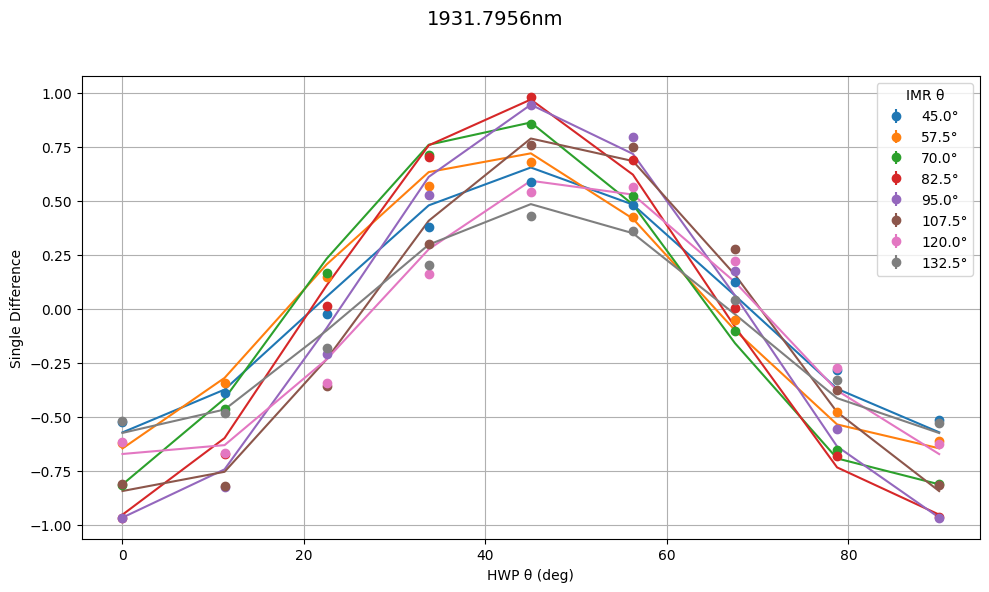

Updated Mueller Matrix:
[[ 0.21253538  0.19628123 -0.00464669  0.08138412]
 [-0.21253538 -0.19628123  0.00464669 -0.08138412]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1255607683711772 0.11803967235206925
Error: [2.08991176e-02 7.18473948e-01 2.11509207e-02 4.67877539e+00
 7.74308148e-03 9.32268967e+00]


array([2.08991176e-02, 7.18473948e-01, 2.11509207e-02, 4.67877539e+00,
       7.74308148e-03, 9.32268967e+00])

In [7]:
# Test fitting with the wavelength bin we plotted earlier

fit_CHARIS_Mueller_matrix_by_bin(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal/bin15.json'),
    plot_path=Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff_cal/bin15.png'),)



Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models. Now we can fit for all bins and collect the errors.

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.456e+02  3.163e+02 ...  4.706e+02  4.376e+02]
           x: [ 4.367e+00  1.211e-02  3.003e+00  1.110e+00  1.000e+00
                5.000e+00]
        cost: 4999312.740382448
         jac: [[-2.805e+03 -1.360e+01 ...  1.070e+03  9.999e+00]
               [-2.195e+03  8.770e+01 ...  6.809e+02  3.511e+01]
               ...
               [-1.903e+03 -9.008e+01 ...  1.091e+03 -7.216e+00]
               [-2.816e+03  1.116e+01 ...  1.076e+03  2.218e+01]]
        grad: [-2.528e-01  1.789e+00  6.852e+01 -6.174e-01 -1.370e+07
               -5.164e+03]
  optimality: 20.669874131074696
 active_mask: [0 0 0 0 1 1]
        nfev: 9
        njev: 9
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.456e+02  3.163e+02 ...  4.706e+02  4.376e+02]
           x: [ 4.367e+00  1.211e-02  3.003e+00  1.110e+00  1.000e+00
                5.0

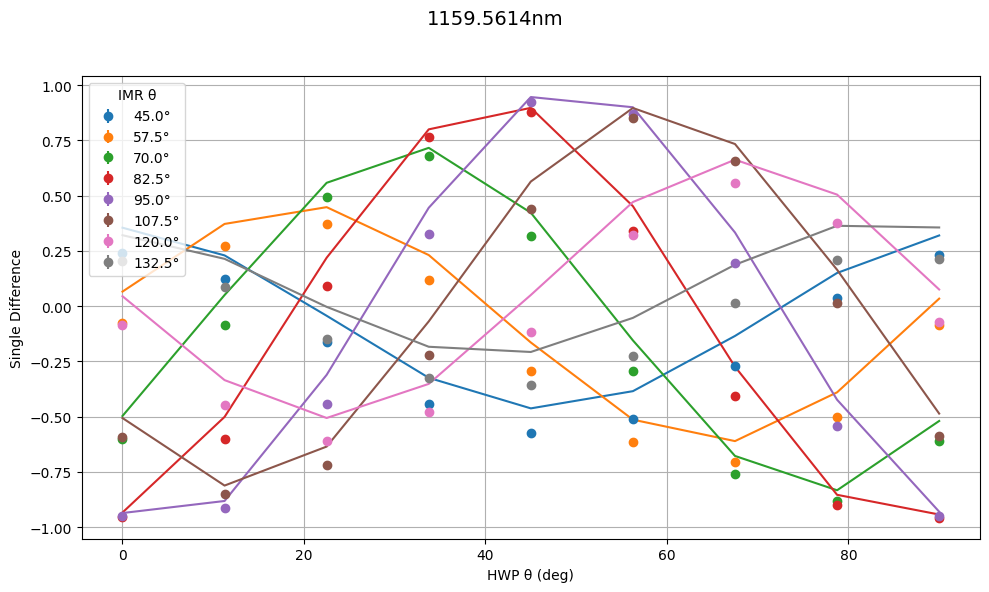

Updated Mueller Matrix:
[[ 6.77908580e-01  6.67609607e-01  1.17717694e-01 -4.58010874e-07]
 [-6.77908580e-01 -6.67609607e-01 -1.17717694e-01  4.58010874e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.1748202860344816 -0.01420680409433539
Error: [ 0.02853617  0.84932029  0.02920751  5.72690112  0.01457382 11.12676278]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 7.478e+01  5.562e+01 ...  6.535e+01  5.741e+01]
           x: [ 4.083e+00  5.076e-02  3.001e+00 -9.801e-01  9.937e-01
                1.351e+00]
        cost: 249449.30210745693
         jac: [[-2.944e+03 -2.420e+01 ...  2.209e+03  5.458e+00]
               [-2.202e+03  1.137e+02 ...  1.439e+03  5.456e+01]
               ...
               [-1.804e+03 -1.279e+02 ...  1.816e+03 -3.261e+01]
               [-2.982e+03  1.174e+01 ...  2.247e+03  2.332e+01]]
  

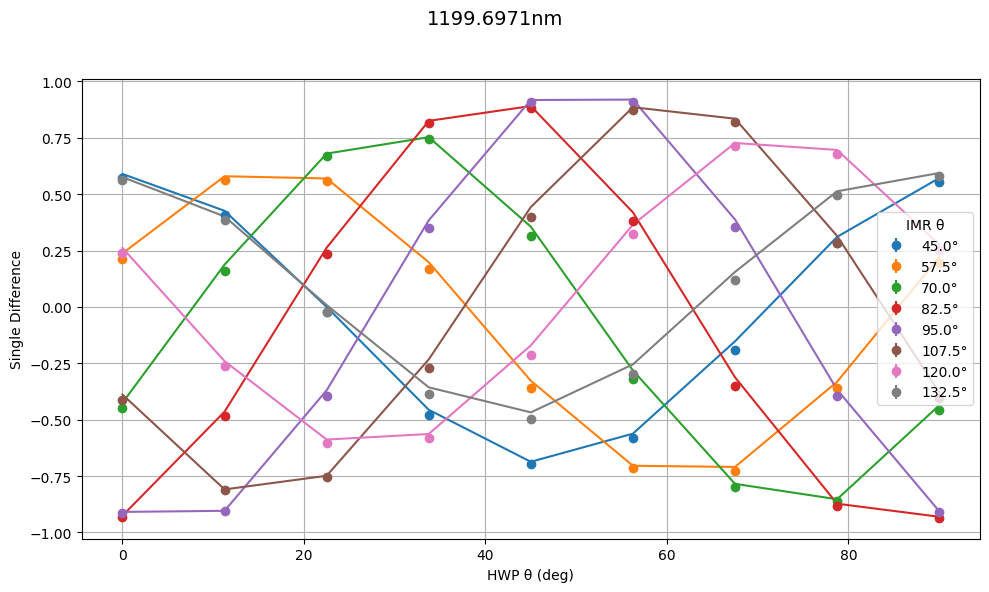

Updated Mueller Matrix:
[[ 0.79701024  0.79438517  0.04751895 -0.04381172]
 [-0.79701024 -0.79438517 -0.04751895  0.04381172]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.04367642339276245 -0.0010339140668947921
Error: [0.00715712 0.27105735 0.00709461 1.46747999 0.00361975 2.78876185]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.569e+02  1.364e+02 ...  1.459e+02  1.048e+02]
           x: [ 3.877e+00 -1.040e+00  3.006e+00 -2.125e+00  9.996e-01
                9.749e-01]
        cost: 1064632.4933949446
         jac: [[-3.294e+03 -3.325e+01 ...  3.780e+03  3.138e+00]
               [-2.332e+03  1.558e+02 ...  2.259e+03  7.985e+01]
               ...
               [-1.730e+03 -1.735e+02 ...  2.734e+03 -5.933e+01]
               [-3.384e+03  2.091e+01 ...  3.892e+03  3.028e+01]]
        grad: [-6.008e+00 -2.081e-01 -2.616e+01 -8.282e-01 -4.337e+01

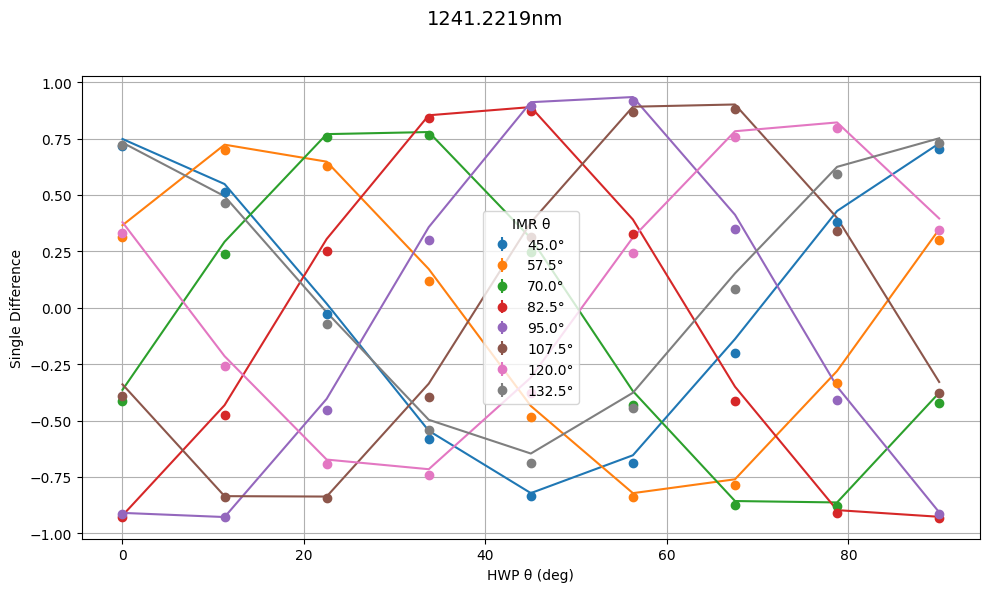

Updated Mueller Matrix:
[[ 0.87567694  0.87504807  0.03204706 -0.00860035]
 [-0.87567694 -0.87504807 -0.03204706  0.00860035]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07024223959504344 -0.0012410905489104174
Error: [0.01450082 0.68184383 0.0136195  3.09591703 0.00624935 5.74678954]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.390e+02  1.160e+02 ...  1.568e+02  8.574e+01]
           x: [ 3.634e+00 -2.672e+00  3.024e+00 -5.000e+00  9.934e-01
               -1.597e+00]
        cost: 1457115.1382181426
         jac: [[-3.436e+03 -5.295e+01 ...  6.811e+03 -7.596e+00]
               [-2.131e+03  2.081e+02 ...  3.396e+03  1.085e+02]
               ...
               [-1.273e+03 -2.262e+02 ...  3.766e+03 -9.553e+01]
               [-3.581e+03  3.609e+01 ...  7.108e+03  3.712e+01]]
        grad: [ 3.621e+01  2.808e+00  1.676e+02  1.764e+03  7.151e-02

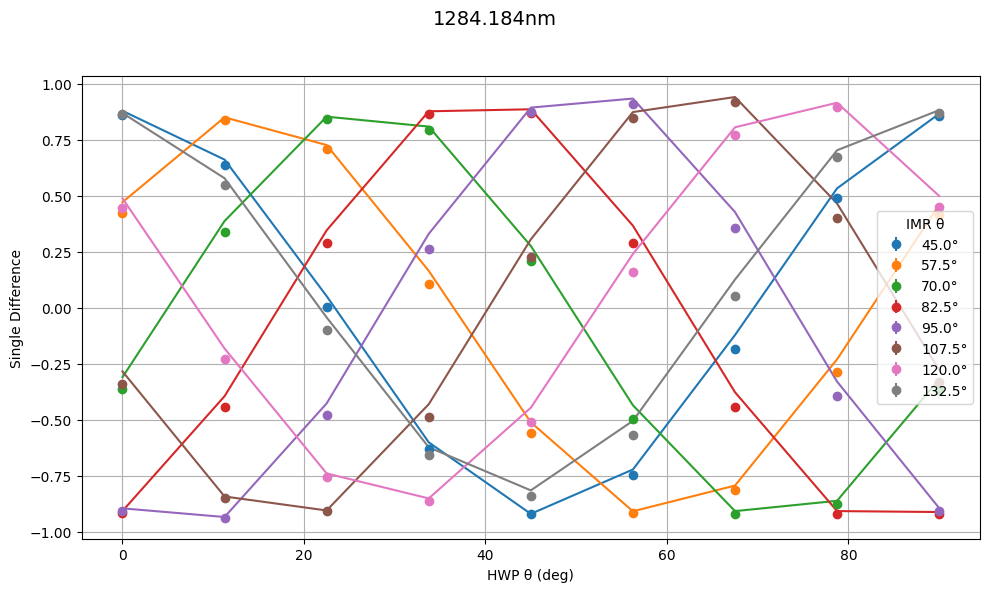

Updated Mueller Matrix:
[[ 0.94098375  0.93958034 -0.04474119 -0.02524746]
 [-0.94098375 -0.93958034  0.04474119  0.02524746]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.08107964864075318 -0.0015235747665662824
Error: [2.04267685e-02 1.36707363e+00 1.75264319e-02 4.89616569e+00
 6.49725326e-03 8.66315632e+00]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-4.607e+01  6.749e+01 ...  8.146e+01 -8.161e+00]
           x: [ 3.444e+00  8.346e-02  3.136e+00  1.151e+00  9.901e-01
                5.000e+00]
        cost: 1573701.014786345
         jac: [[-4.045e+03 -9.309e+01 ...  1.312e+04 -4.480e+01]
               [-1.510e+03  2.819e+02 ...  4.870e+03  1.380e+02]
               ...
               [-1.317e+03 -2.855e+02 ...  4.709e+03 -1.385e+02]
               [-4.041e+03  6.934e+01 ...  1.312e+04  3.641e+01]]
        grad: [-8.153e+00 -3.004e+00 -4.704e+

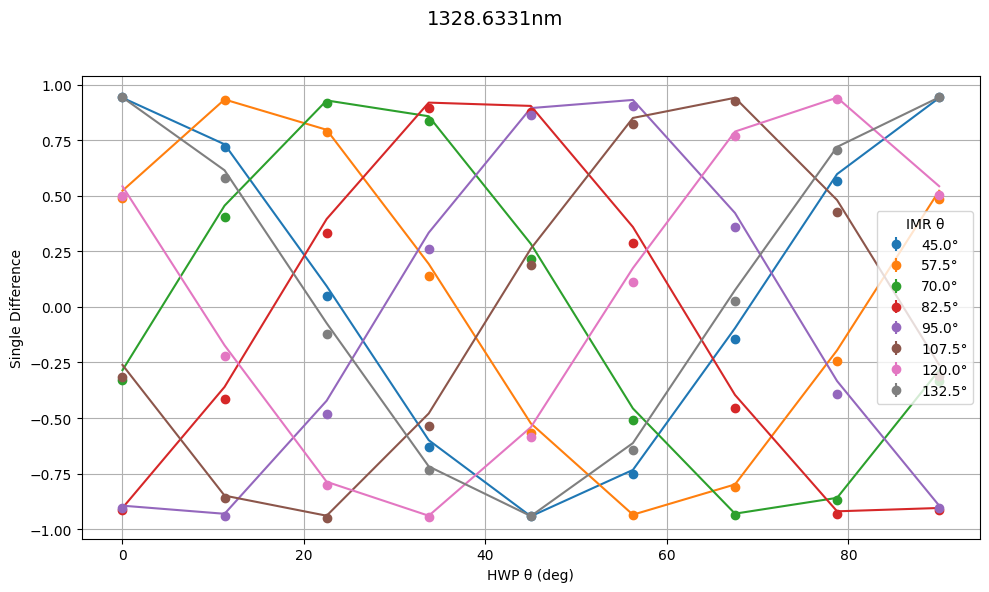

Updated Mueller Matrix:
[[ 0.97136508  0.95544153  0.17392436 -0.02078304]
 [-0.97136508 -0.95544153 -0.17392436  0.02078304]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07390512890383397 0.0033369607132086587
Error: [2.55502723e-02 2.97299588e+00 2.06786659e-02 1.07070494e+02
 5.76797219e-03 2.13906433e+02]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.975e+02  4.944e+02 ...  4.712e+02  6.843e+02]
           x: [ 2.707e+00  4.389e+00  2.988e+00  5.000e+00  9.935e-01
                3.807e+00]
        cost: 11110881.458109017
         jac: [[ 8.711e+03 -1.284e+02 ...  1.939e+04 -1.172e+02]
               [ 2.983e+03  5.757e+02 ...  1.010e+04  2.437e+02]
               ...
               [ 4.908e+03 -5.413e+02 ...  8.544e+03 -2.867e+02]
               [ 8.120e+03  1.103e+02 ...  1.809e+04  3.892e+00]]
        grad: [ 9.410e+06 -2.424e+01  8.484e+

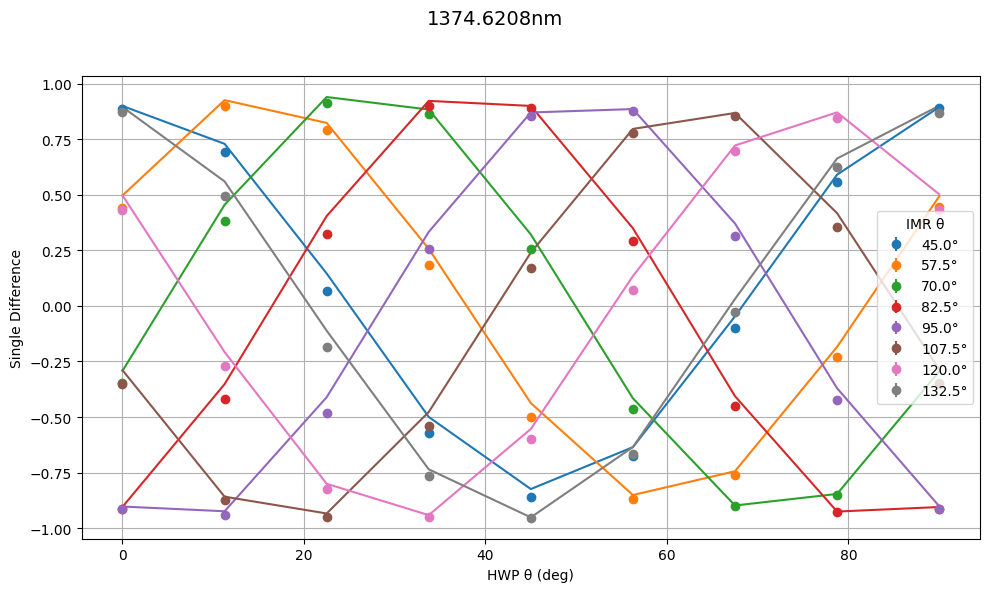

Updated Mueller Matrix:
[[ 0.95069302  0.94197079  0.12623862  0.02391768]
 [-0.95069302 -0.94197079 -0.12623862 -0.02391768]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0791368877963875 -0.00040222457919758536
Error: [2.45548313e-02 1.79861542e+00 2.05187958e-02 5.18053433e+00
 6.95953627e-03 8.32080763e+00]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.286e+02  3.955e+02 ...  4.212e+02  5.633e+02]
           x: [ 2.441e+00  2.458e+00  2.960e+00  2.993e+00  9.989e-01
                3.589e+00]
        cost: 7807750.564178798
         jac: [[ 6.502e+03 -5.421e+01 ...  7.658e+03 -7.114e+01]
               [ 3.458e+03  3.324e+02 ...  5.480e+03  1.084e+02]
               ...
               [ 4.331e+03 -3.091e+02 ...  4.260e+03 -1.636e+02]
               [ 6.203e+03  5.143e+01 ...  7.306e+03 -1.725e+01]]
        grad: [ 8.554e+01  5.089e+00 -3.507e+

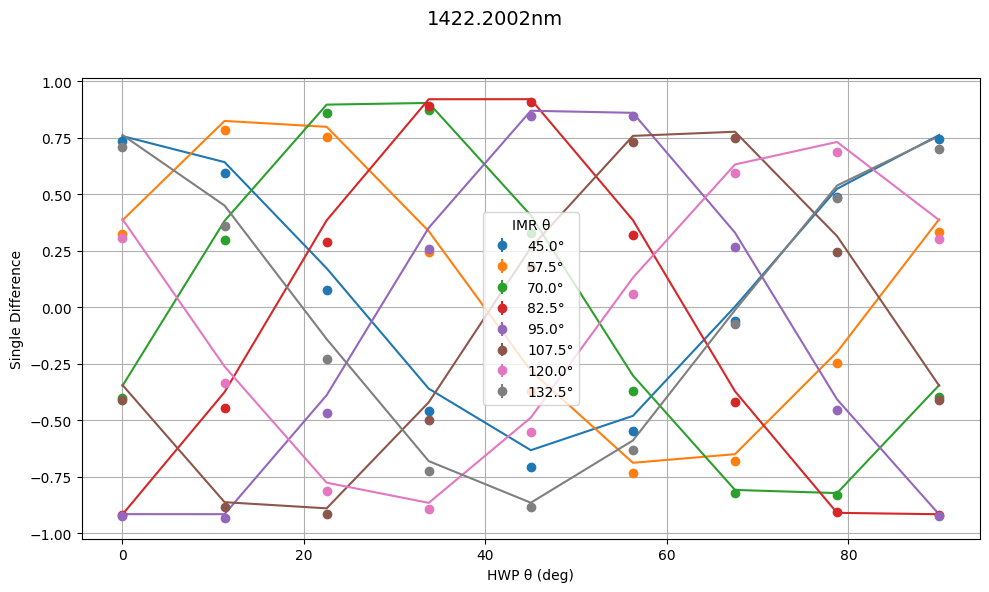

Updated Mueller Matrix:
[[ 0.87913514  0.87226351  0.10865459  0.01513729]
 [-0.87913514 -0.87226351 -0.10865459 -0.01513729]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0986133336234487 0.0037040019719157824
Error: [0.02074609 1.01185406 0.01904949 3.64162626 0.00876879 6.39236113]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.722e+02  2.760e+02 ...  3.824e+02  5.015e+02]
           x: [ 2.174e+00  8.575e-01  2.958e+00  5.693e-01  9.973e-01
                1.794e+00]
        cost: 5026171.211780043
         jac: [[ 6.572e+03 -3.560e+01 ...  4.452e+03 -5.816e+01]
               [ 4.352e+03  2.635e+02 ...  3.730e+03  5.590e+01]
               ...
               [ 4.635e+03 -2.490e+02 ...  2.808e+03 -1.199e+02]
               [ 6.411e+03  3.911e+01 ...  4.339e+03 -2.033e+01]]
        grad: [ 5.997e+01  5.183e-01 -2.849e+02  2.885e+00 -1.771e+01
  

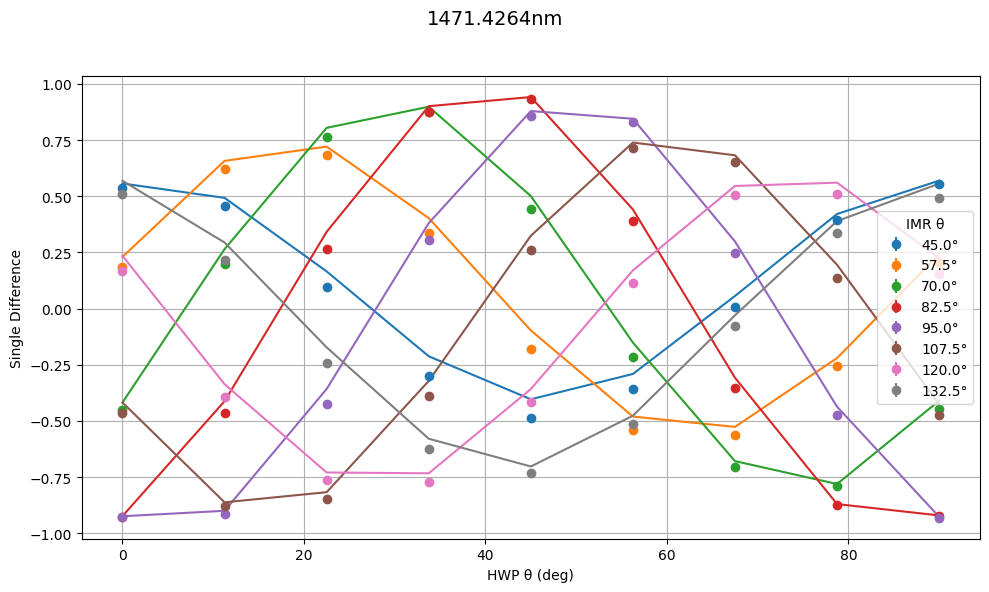

Updated Mueller Matrix:
[[ 0.7780351   0.7760815   0.04590635  0.03047504]
 [-0.7780351  -0.7760815  -0.04590635 -0.03047504]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.087269613110387 -0.002312110535580447
Error: [0.01418024 0.5219081  0.01408521 2.35534628 0.00723453 4.35441704]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.993e+02  2.870e+02 ...  4.018e+02  5.078e+02]
           x: [ 1.928e+00  3.324e-01  2.953e+00 -5.119e-01  9.958e-01
                5.065e-01]
        cost: 5052883.832686894
         jac: [[ 6.343e+03 -2.420e+01 ...  2.327e+03 -4.946e+01]
               [ 4.570e+03  2.032e+02 ...  2.236e+03  1.305e+01]
               ...
               [ 4.620e+03 -1.952e+02 ...  1.529e+03 -7.902e+01]
               [ 6.284e+03  3.101e+01 ...  2.299e+03 -2.185e+01]]
        grad: [ 2.352e+01  1.222e+00 -1.809e+02  4.143e-01 -3.399e+00
   

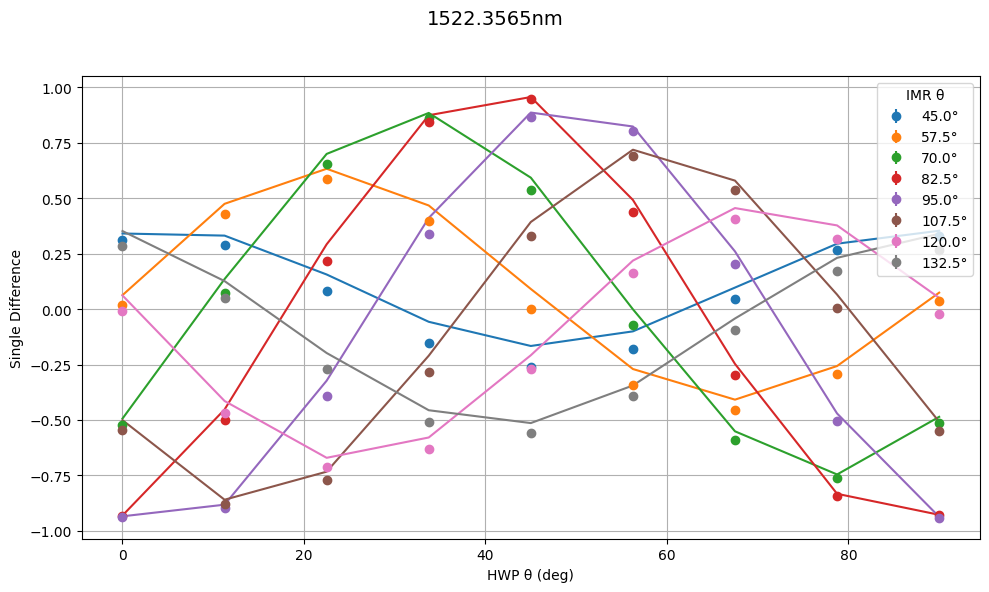

Updated Mueller Matrix:
[[ 0.66980037  0.66840279  0.00757673  0.04257742]
 [-0.66980037 -0.66840279 -0.00757673 -0.04257742]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09570029312604128 -0.002373319228554438
Error: [0.01358296 0.4133126  0.01399944 2.11872221 0.0074275  4.0159514 ]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.050e+02  3.025e+02 ...  4.278e+02  5.212e+02]
           x: [ 1.716e+00 -2.131e-02  2.955e+00 -1.475e+00  9.958e-01
               -6.994e-01]
        cost: 5407780.039325764
         jac: [[ 7.140e+03 -2.212e+01 ...  1.016e+03 -4.905e+01]
               [ 5.372e+03  1.860e+02 ...  1.275e+03 -1.956e+01]
               ...
               [ 5.171e+03 -1.828e+02 ...  6.513e+02 -5.196e+01]
               [ 7.155e+03  2.825e+01 ...  1.011e+03 -2.418e+01]]
        grad: [-1.889e+00  1.382e+00 -2.528e+01 -1.255e+00 -1.662e-01
 

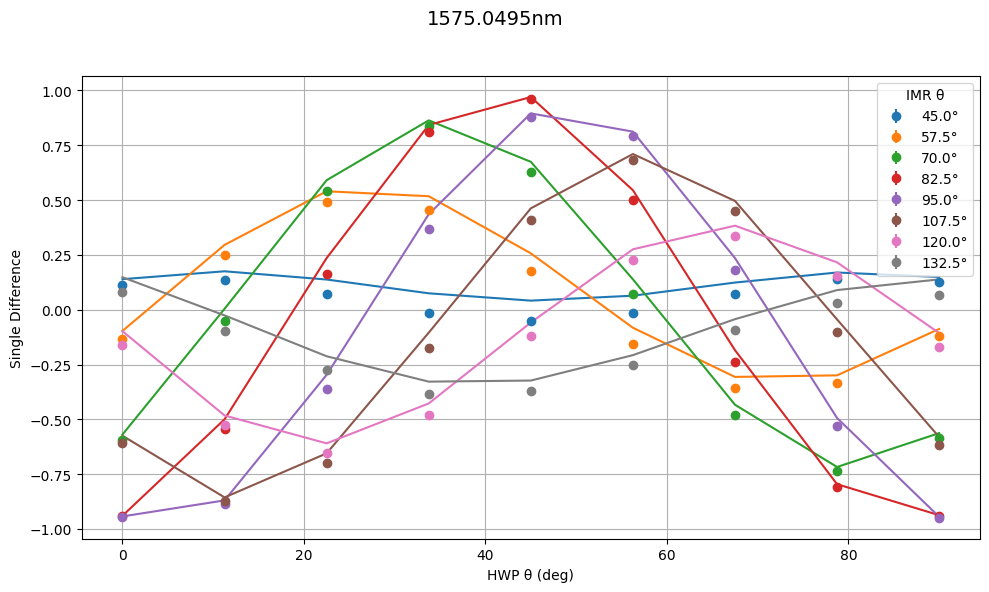

Updated Mueller Matrix:
[[ 0.56910046  0.56701706 -0.01821673  0.04511253]
 [-0.56910046 -0.56701706  0.01821673 -0.04511253]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09361507106723102 -0.001447218168975417
Error: [0.01223256 0.3346576  0.01282733 1.84332796 0.00660315 3.54936808]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.591e+02  2.602e+02 ...  3.990e+02  4.788e+02]
           x: [ 1.520e+00 -2.759e-01  2.961e+00 -1.345e+00  9.939e-01
                3.384e-02]
        cost: 4444535.861785993
         jac: [[ 8.225e+03 -2.057e+01 ... -4.842e+02 -4.772e+01]
               [ 6.309e+03  1.759e+02 ...  1.290e+02 -5.551e+01]
               ...
               [ 5.835e+03 -1.748e+02 ... -3.698e+02 -1.708e+01]
               [ 8.308e+03  2.728e+01 ... -4.978e+02 -2.426e+01]]
        grad: [-1.185e+01  3.223e+00 -1.683e+02  6.372e-01 -6.853e-01
 

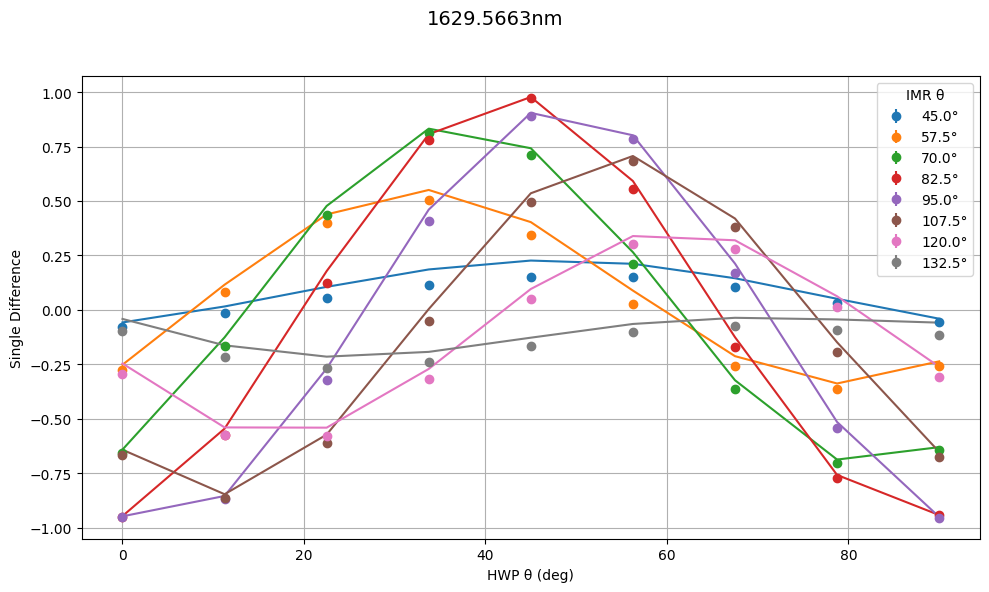

Updated Mueller Matrix:
[[ 0.47059592  0.46737134 -0.00402959  0.05484805]
 [-0.47059592 -0.46737134  0.00402959 -0.05484805]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07437572683712729 -0.0018784129907211122
Error: [0.00970246 0.25545432 0.01019158 1.45649085 0.0049498  2.83699983]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.538e+02  2.598e+02 ...  3.770e+02  4.272e+02]
           x: [ 1.357e+00 -4.108e-01  2.969e+00 -1.570e+00  9.934e-01
               -2.067e-01]
        cost: 3945511.6374299247
         jac: [[ 8.238e+03 -1.703e+01 ... -1.863e+03 -3.983e+01]
               [ 6.327e+03  1.481e+02 ... -9.653e+02 -8.164e+01]
               ...
               [ 5.676e+03 -1.472e+02 ... -1.268e+03  2.009e+01]
               [ 8.365e+03  2.378e+01 ... -1.902e+03 -1.989e+01]]
        grad: [-1.668e+01  2.795e+00 -1.460e+02 -4.845e-01 -1.244e-01

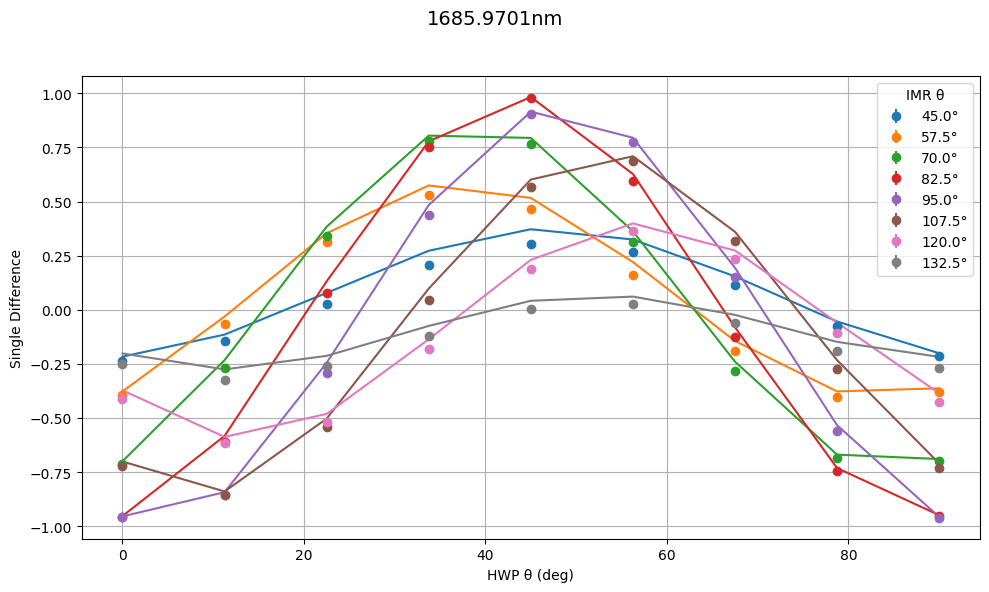

Updated Mueller Matrix:
[[ 0.39113834  0.38707464 -0.00658488  0.05584856]
 [-0.39113834 -0.38707464  0.00658488 -0.05584856]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0661968575775348 -0.0018735674684836612
Error: [0.00932472 0.25004804 0.00980467 1.4168955  0.00442134 2.78072656]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.906e+02  3.132e+02 ...  3.882e+02  4.213e+02]
           x: [ 1.240e+00 -4.415e-01  2.981e+00 -2.255e+00  9.942e-01
               -1.397e+00]
        cost: 4589091.718291525
         jac: [[ 8.552e+03 -1.661e+01 ... -2.991e+03 -3.357e+01]
               [ 6.551e+03  1.335e+02 ... -1.824e+03 -1.026e+02]
               ...
               [ 5.693e+03 -1.337e+02 ... -1.937e+03  5.038e+01]
               [ 8.703e+03  2.100e+01 ... -3.051e+03 -1.516e+01]]
        grad: [-3.865e+01  9.091e+00 -8.034e+01  1.114e+00 -4.932e-01
 

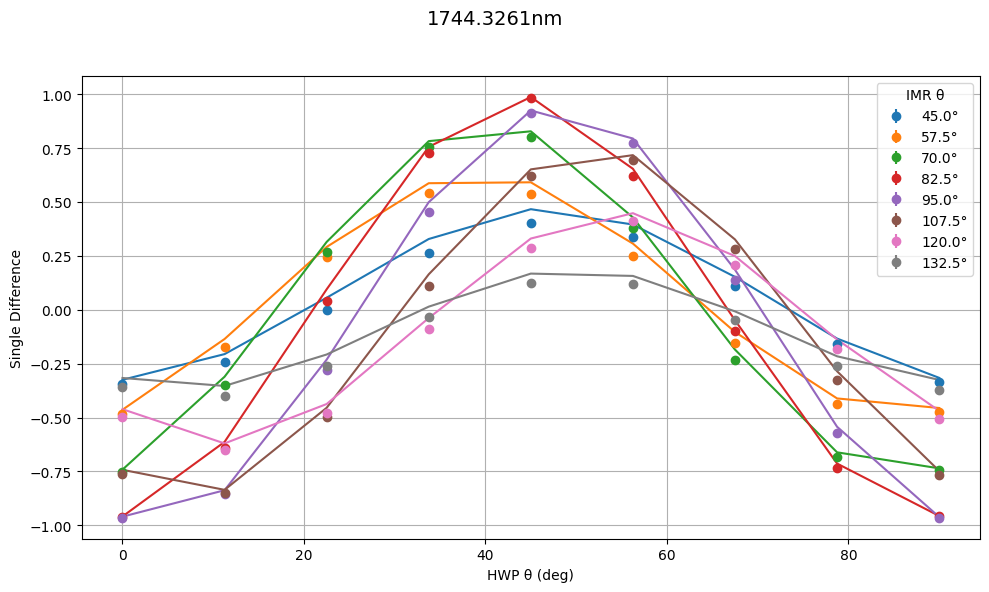

Updated Mueller Matrix:
[[ 0.3372734   0.33292196 -0.01876499  0.05063781]
 [-0.3372734  -0.33292196  0.01876499 -0.05063781]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.0653381587336122 -0.0011590452229102155
Error: [0.00991514 0.27692464 0.01046136 1.57273189 0.00435216 3.10256284]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 4.367e+02  6.610e+02 ...  7.032e+02  7.211e+02]
           x: [ 1.139e+00 -3.913e-01  2.992e+00 -2.284e+00  9.942e-01
               -1.297e+00]
        cost: 17245582.95811323
         jac: [[ 1.291e+04 -2.514e+01 ... -6.042e+03 -4.006e+01]
               [ 9.809e+03  1.756e+02 ... -3.880e+03 -1.789e+02]
               ...
               [ 8.236e+03 -1.786e+02 ... -3.760e+03  1.154e+02]
               [ 1.318e+04  2.587e+01 ... -6.171e+03 -1.499e+01]]
        grad: [-7.554e+01  1.227e+01 -5.103e+02  2.005e+00  2.410e-01
 

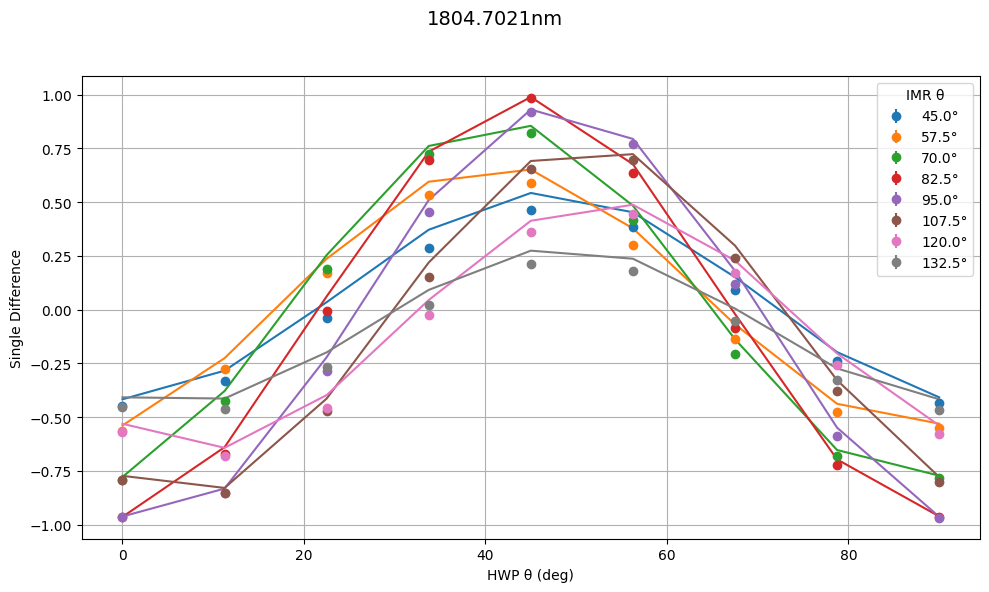

Updated Mueller Matrix:
[[ 0.29145762  0.28693948 -0.01458684  0.04899494]
 [-0.29145762 -0.28693948  0.01458684 -0.04899494]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.08377438840014773 -0.0011130612032932419
Error: [0.01315916 0.38721095 0.01400213 2.17288207 0.00551795 4.30252205]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 8.981e+01  5.881e+02 ...  7.469e+02  4.661e+02]
           x: [ 1.035e+00 -4.315e-01  3.017e+00 -3.109e+00  9.898e-01
               -2.824e+00]
        cost: 43189339.54765859
         jac: [[ 2.815e+04 -4.965e+01 ... -1.687e+04 -4.582e+01]
               [ 2.122e+04  3.357e+02 ... -1.134e+04 -4.369e+02]
               ...
               [ 1.741e+04 -3.382e+02 ... -9.920e+03  3.570e+02]
               [ 2.869e+04  4.932e+01 ... -1.719e+04  3.574e+00]]
        grad: [-3.791e+08 -1.066e+01 -3.351e+01  2.407e+00 -8.946e-01


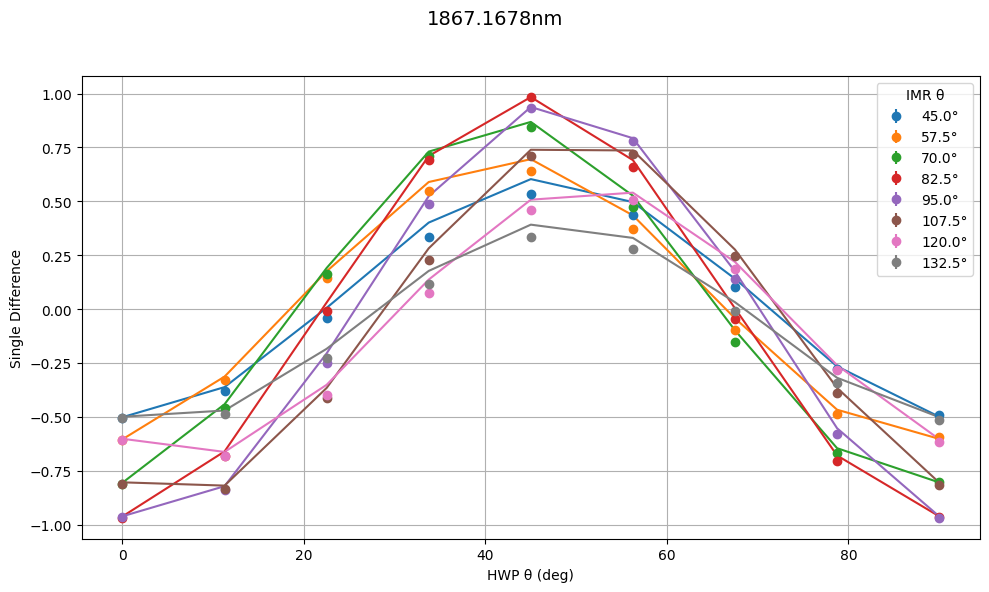

Updated Mueller Matrix:
[[ 0.24910163  0.24027749 -0.02354672  0.06135067]
 [-0.24910163 -0.24027749  0.02354672 -0.06135067]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.06974961169027105 0.009009452973468057
Error: [0.00975553 0.31027366 0.01024596 1.90651631 0.00380961 3.79083116]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.028e+03 -6.736e+02 ... -4.929e+02 -9.295e+02]
           x: [ 9.474e-01 -5.053e-01  3.039e+00 -4.238e+00  9.816e-01
               -5.000e+00]
        cost: 16697940.993538138
         jac: [[ 1.868e+04 -2.884e+01 ... -1.356e+04 -4.611e+00]
               [ 1.400e+04  1.996e+02 ... -9.375e+03 -3.203e+02]
               ...
               [ 1.135e+04 -1.974e+02 ... -7.671e+03  3.012e+02]
               [ 1.892e+04  3.018e+01 ... -1.374e+04  2.516e+01]]
        grad: [-4.458e+08  6.367e+00  4.991e+01  9.662e-01 -1.493e+00
 

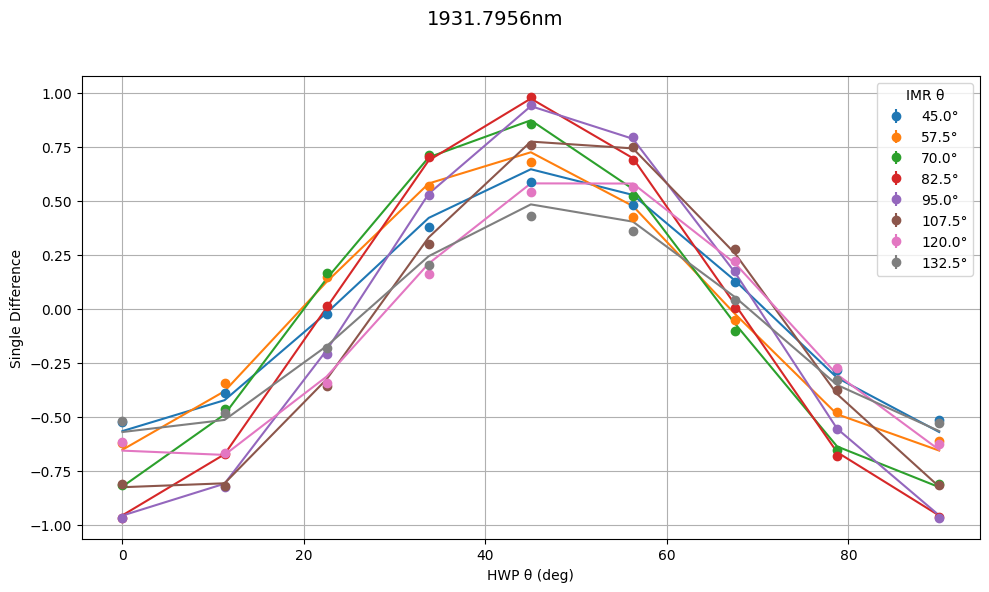

Updated Mueller Matrix:
[[ 0.21702678  0.19992064 -0.03226116  0.07804857]
 [-0.21702678 -0.19992064  0.03226116 -0.07804857]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.06051526847665756 0.05738383940690417
Error: [9.22381548e-03 3.18337852e-01 9.41427232e-03 2.18986515e+00
 3.42299762e-03 4.36489546e+00]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.239e+03 -7.553e+02 ... -6.541e+02 -1.269e+03]
           x: [ 8.833e-01 -3.741e-01  3.061e+00 -4.269e+00  9.771e-01
               -5.000e+00]
        cost: 26991005.83070053
         jac: [[ 1.571e+04 -2.533e+01 ... -1.311e+04  1.443e+01]
               [ 1.173e+04  1.521e+02 ... -9.198e+03 -2.904e+02]
               ...
               [ 9.337e+03 -1.522e+02 ... -7.193e+03  2.965e+02]
               [ 1.586e+04  2.034e+01 ... -1.322e+04  3.760e+01]]
        grad: [-4.612e+08 -3.126e+01  2.842e+01 

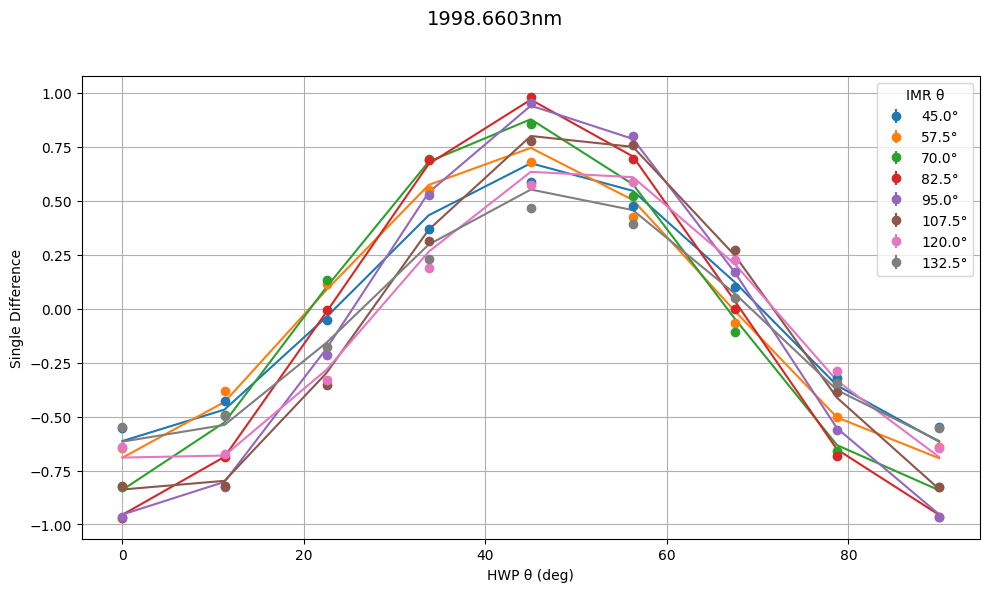

Updated Mueller Matrix:
[[ 0.19351877  0.17322695 -0.02489918  0.08259521]
 [-0.19351877 -0.17322695  0.02489918 -0.08259521]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.08863532618009418 0.06771480390390638
Error: [1.42429705e-02 5.21730864e-01 1.44792083e-02 4.22585218e+00
 4.99072152e-03 8.43664318e+00]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.522e+03 -1.045e+03 ... -9.826e+02 -1.671e+03]
           x: [ 8.399e-01 -2.677e-01  3.093e+00 -4.291e+00  9.691e-01
               -5.000e+00]
        cost: 33494120.619201463
         jac: [[ 1.413e+04 -2.350e+01 ... -1.302e+04  3.357e+01]
               [ 1.049e+04  1.281e+02 ... -9.333e+03 -2.697e+02]
               ...
               [ 8.385e+03 -1.292e+02 ... -6.940e+03  3.032e+02]
               [ 1.420e+04  1.520e+01 ... -1.305e+04  5.313e+01]]
        grad: [-4.718e+08  2.619e+01 -5.245e+01

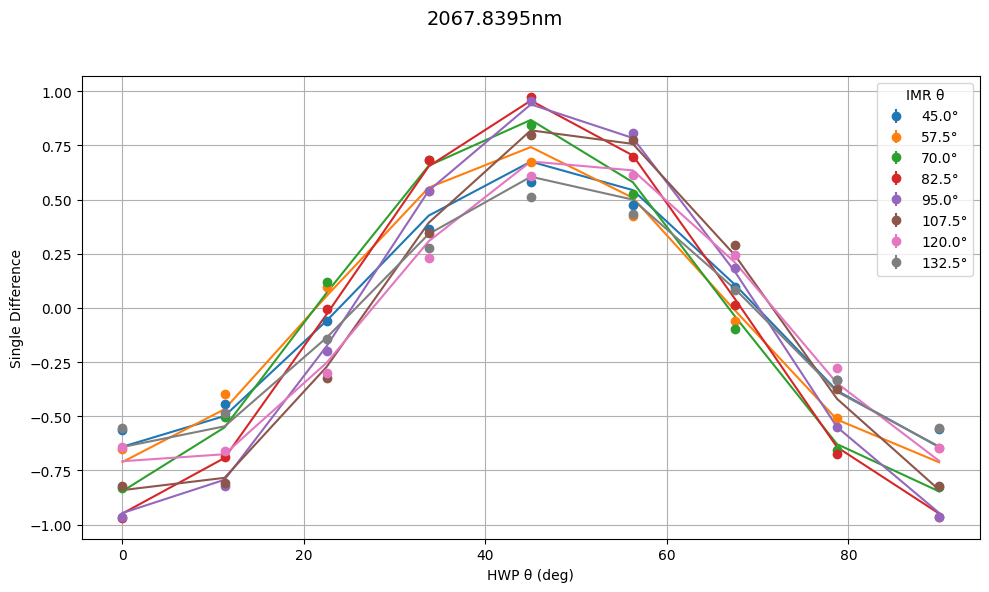

Updated Mueller Matrix:
[[ 0.17993857  0.15367585 -0.01714752  0.09201948]
 [-0.17993857 -0.15367585  0.01714752 -0.09201948]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09330161714995322 0.08974487874966453
Error: [1.78262104e-02 6.85935604e-01 1.77952035e-02 8.82878765e+00
 6.15843686e-03 1.76476155e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.521e+03 -1.079e+03 ... -1.047e+03 -1.746e+03]
           x: [ 8.140e-01 -1.236e-01  3.134e+00 -4.272e+00  9.654e-01
               -5.000e+00]
        cost: 33869823.787191905
         jac: [[ 1.221e+04 -2.124e+01 ... -1.193e+04  4.753e+01]
               [ 8.949e+03  1.060e+02 ... -8.728e+03 -2.318e+02]
               ...
               [ 7.300e+03 -1.075e+02 ... -6.175e+03  2.872e+02]
               [ 1.223e+04  1.099e+01 ... -1.190e+04  6.361e+01]]
        grad: [-4.073e+08  5.048e+02 -1.115e+03

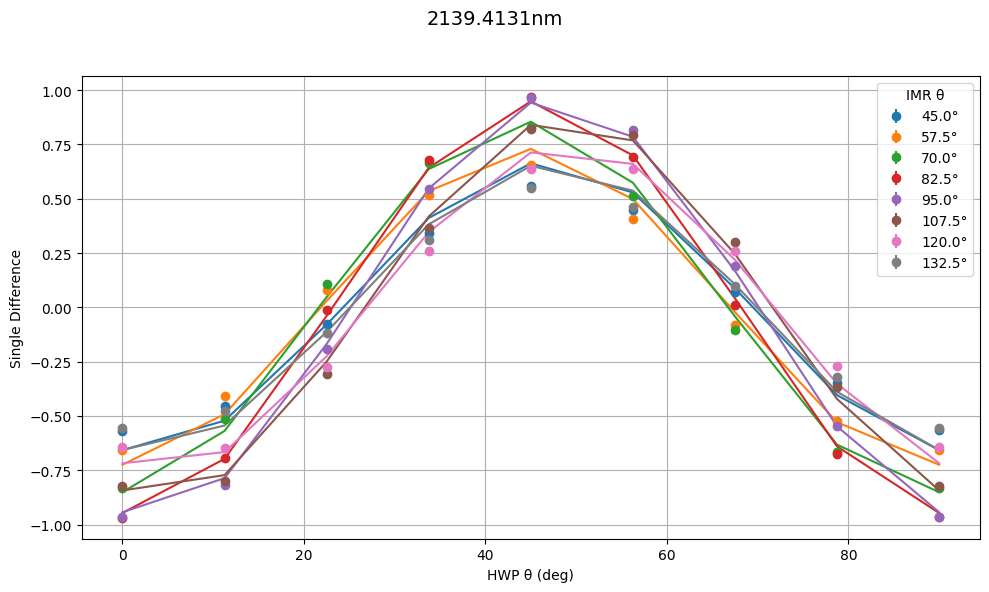

Updated Mueller Matrix:
[[ 0.17162983  0.14285552 -0.010912    0.09449882]
 [-0.17162983 -0.14285552  0.010912   -0.09449882]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.10385215542832527 0.1027017394791746
Error: [2.09075263e-02 8.27887042e-01 2.06915918e-02 6.54732267e+01
 7.07173329e-03 1.30945174e+02]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.761e+03 -1.384e+03 ... -1.420e+03 -2.036e+03]
           x: [ 8.003e-01  1.345e-01  3.180e+00  7.634e-01  9.546e-01
                5.000e+00]
        cost: 39309327.92652708
         jac: [[ 1.057e+04 -2.037e+01 ... -1.063e+04  5.685e+01]
               [ 7.742e+03  8.909e+01 ... -8.020e+03 -1.944e+02]
               ...
               [ 6.539e+03 -9.305e+01 ... -5.440e+03  2.691e+02]
               [ 1.056e+04  7.025e+00 ... -1.057e+04  7.010e+01]]
        grad: [-3.694e+08  3.977e+02 -2.488e+03 -

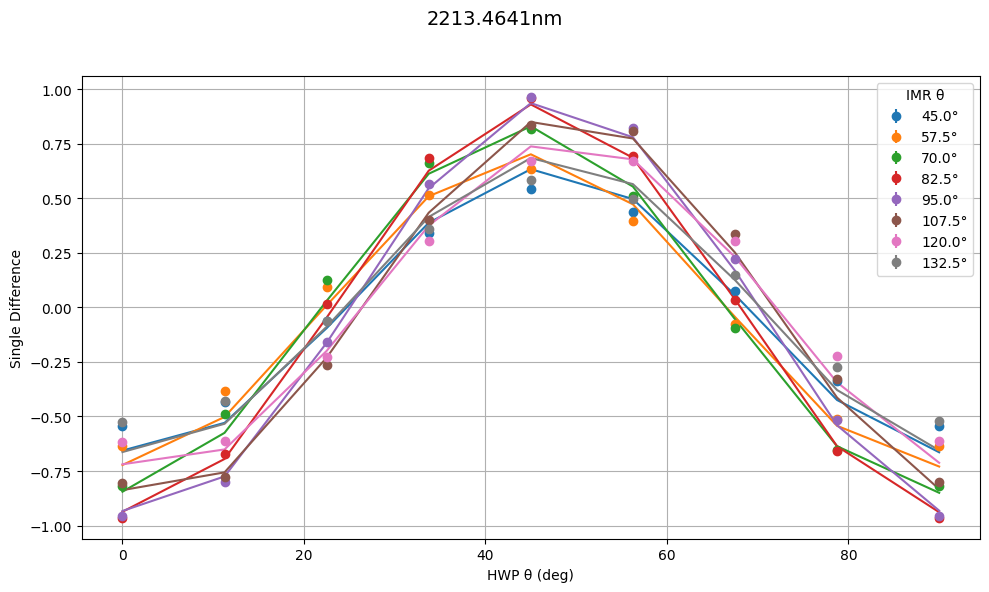

Updated Mueller Matrix:
[[ 0.17242182  0.12854736  0.04333491  0.10642813]
 [-0.17242182 -0.12854736 -0.04333491 -0.10642813]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09894899708438076 0.1381345207669482
Error: [2.58607104e-02 1.05027254e+00 2.49428708e-02 1.60752996e+01
 8.83031068e-03 3.21403567e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.231e+03 -9.269e+02 ... -8.947e+02 -1.506e+03]
           x: [ 8.026e-01  2.802e-01  3.242e+00  7.850e-01  9.484e-01
                5.000e+00]
        cost: 26712186.008002397
         jac: [[ 9.252e+03 -1.886e+01 ... -9.167e+03  6.763e+01]
               [ 6.656e+03  7.708e+01 ... -7.136e+03 -1.512e+02]
               ...
               [ 5.861e+03 -8.021e+01 ... -4.450e+03  2.445e+02]
               [ 9.243e+03  5.238e+00 ... -9.100e+03  7.891e+01]]
        grad: [-2.668e+08 -1.583e+02  3.359e+02 

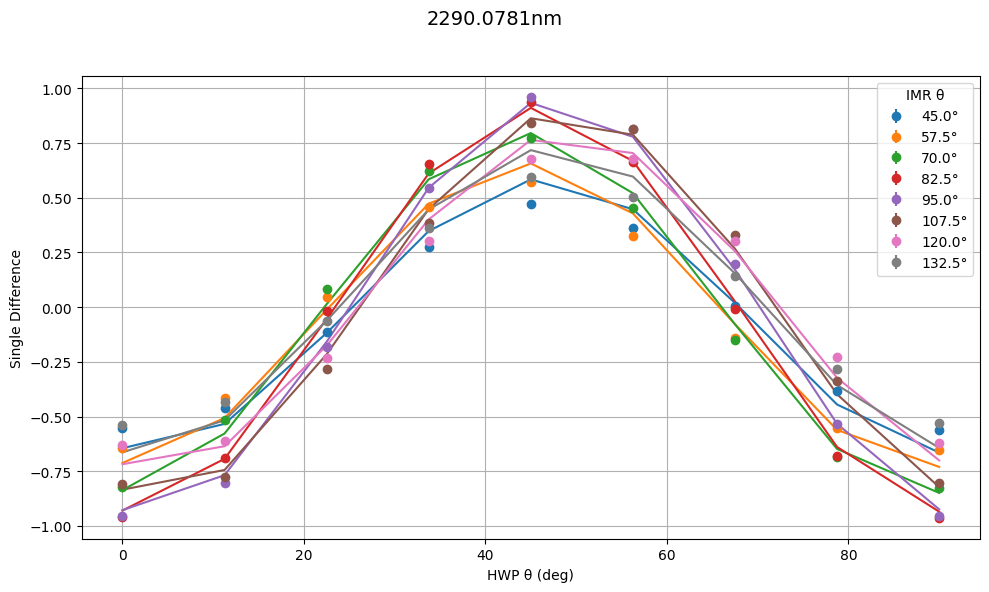

Updated Mueller Matrix:
[[ 0.17833138  0.12809471  0.05118896  0.11301999]
 [-0.17833138 -0.12809471 -0.05118896 -0.11301999]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12438638426844095 0.12414334314058062
Error: [2.51650774e-02 1.01173251e+00 2.46607836e-02 5.92985318e+00
 8.80287495e-03 1.18333150e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.969e+03 -1.663e+03 ... -1.989e+03 -2.231e+03]
           x: [ 8.154e-01  9.627e-01  3.263e+00  7.898e-01  9.284e-01
                5.000e+00]
        cost: 55082518.37731439
         jac: [[ 6.958e+03 -1.941e+01 ... -6.862e+03  5.257e+01]
               [ 5.233e+03  5.713e+01 ... -5.512e+03 -1.111e+02]
               ...
               [ 4.638e+03 -6.862e+01 ... -3.508e+03  1.933e+02]
               [ 6.964e+03 -9.139e-01 ... -6.783e+03  6.107e+01]]
        grad: [-2.117e+08  5.810e+02 -1.232e+04 

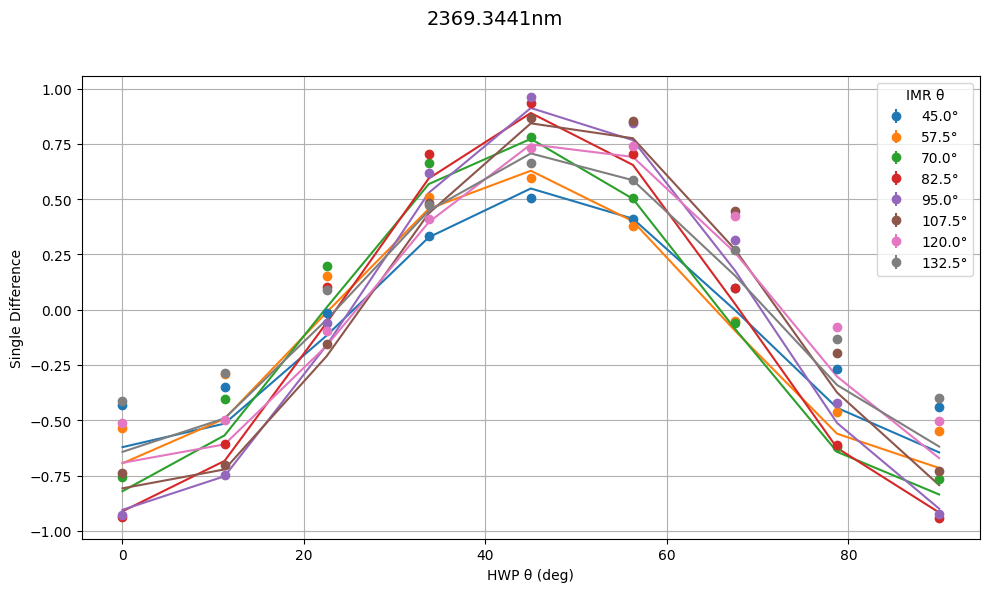

Updated Mueller Matrix:
[[ 0.19049842  0.12283941  0.05661762  0.13414385]
 [-0.19049842 -0.12283941 -0.05661762 -0.13414385]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.04477689883497338 0.2309555711559097
Error: [4.48156781e-02 1.82682031e+00 4.12348351e-02 9.37782573e+00
 1.65774428e-02 1.86931103e+01]


In [3]:
# Fit all 22 wavelength bins
errors = []
for bin in range(0,22):
    error = fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin{bin}_no_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal/sysdictbin{bin}nopick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff_cal/bin{bin}nopick.png')
    )
    errors.append(error)


In [4]:
# Now let's make a dataframe of our data, this model data function can be changed easily to include
# whatever parameters you're fitting
json_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal'
df = model_data(json_dir)
df

wavelength_bin  hwp_retardance  imr_retardance  \
0        1159.5614        3.003316        4.366637   
1        1199.6971        3.001242        4.083096   
2        1241.2219        3.006353        3.876664   
3        1284.1840        3.024170        3.634134   
4        1328.6331        3.136389        3.444129   
5        1374.6208        2.987938        2.706625   
6        1422.2002        2.959807        2.440979   
7        1471.4264        2.957801        2.174051   
8        1522.3565        2.953133        1.928438   
9        1575.0495        2.954621        1.716497   
10       1629.5663        2.961108        1.520203   
11       1685.9701        2.969445        1.356808   
12       1744.3261        2.981286        1.239633   
13       1804.7021        2.992001        1.139152   
14       1867.1678        3.016826        1.035290   
15       1931.7956        3.038904        0.947384   
16       1998.6603        3.060807        0.883334   
17       2067.8395        3.093479        0.839936   
18       2139.4131        3.134027        0.814041   
19       2213.4641        3.180298        0.800300   
20       2290.0781        3.242030        0.802597   
21       2369.3441        3.262524        0.815376   

    calibration_polarizer_diattenuation  hwp_offset  hwp_offset_std  \
0                              1.000000   -1.116408        2.533738   
1                              0.993693   -1.116408        2.533738   
2                              0.999636   -1.116408        2.533738   
3                              0.993403   -1.116408        2.533738   
4                              0.990080   -1.116408        2.533738   
5                              0.993508   -1.116408        2.533738   
6                              0.998911   -1.116408        2.533738   
7                              0.997279   -1.116408        2.533738   
8                              0.995848   -1.116408        2.533738   
9                              0.995802   -1.116408        2.533738   
10                             0.993902   -1.116408        2.533738   
11                             0.993395   -1.116408        2.533738   
12                             0.994225   -1.116408        2.533738   
13                             0.994150   -1.116408        2.533738   
14                             0.989816   -1.116408        2.533738   
15                             0.981553   -1.116408        2.533738   
16                             0.977140   -1.116408        2.533738   
17                             0.969142   -1.116408        2.533738   
18                             0.965422   -1.116408        2.533738   
19                             0.954573   -1.116408        2.533738   
20                             0.948409   -1.116408        2.533738   
21                             0.928372   -1.116408        2.533738   

    imr_offset  imr_offset_std  cal_offset  cal_offset_std  
0     0.118362         1.28547    0.410712        3.500702  
1     0.118362         1.28547    0.410712        3.500702  
2     0.118362         1.28547    0.410712        3.500702  
3     0.118362         1.28547    0.410712        3.500702  
4     0.118362         1.28547    0.410712        3.500702  
5     0.118362         1.28547    0.410712        3.500702  
6     0.118362         1.28547    0.410712        3.500702  
7     0.118362         1.28547    0.410712        3.500702  
8     0.118362         1.28547    0.410712        3.500702  
9     0.118362         1.28547    0.410712        3.500702  
10    0.118362         1.28547    0.410712        3.500702  
11    0.118362         1.28547    0.410712        3.500702  
12    0.118362         1.28547    0.410712        3.500702  
13    0.118362         1.28547    0.410712        3.500702  
14    0.118362         1.28547    0.410712        3.500702  
15    0.118362         1.28547    0.410712        3.500702  
16    0.118362         1.28547    0.410712        3.500702  
17    0.118362         1.2854

# Step 5: Refine Model

This step depends heavily on what components you are fitting to. I'm going to make the IMR and HWP retardances a function of wavelength using the Joost t Hart 2021 physical models. I'll use the parameters we just fitted as my dataset. 

In [39]:
def phys_model_chisq(p0, wavelengths, retardances_hwp, errors_hwp, retardances_imr,errors_imr):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [w_sio2, w_mgf2, d].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    retardances_hwp : list or numpy array
        Retardances of the HWP at the specified wavelengths.

    errors_hwp : list or numpy array
        Errors associated with the HWP retardances.

    retardances_imr : list or numpy array
        Retardances of the IMR at the specified wavelengths.
    
    errors_imr : list or numpy array
        Errors associated with the IMR retardances.
    
    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model retardances
    model_hwp = HWP_retardance(wavelengths, p0[0], p0[1])
    model_imr = IMR_retardance(wavelengths, p0[2])
    # Calculate residuals
    residuals_hwp = (retardances_hwp - model_hwp) / errors_hwp
    residuals_imr = (retardances_imr - model_imr) / errors_imr
    # Calculate log-likelihood
    logl_hwp = np.sum(residuals_hwp**2)
    logl_imr = np.sum(residuals_imr**2)
    return logl_hwp + logl_imr

In [44]:

# Minimizing the physical model

p0 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021
wavelengths = wavelength_bins # CHARIS wavelength bins

# Defining reasonable bounds (these values shouldn't have changed much)
  
wsio2_bounds = (0.9*p0[0], 1.1*p0[0])
wmgf2_bounds = (0.9*p0[1], 1.1*p0[1])
d_bounds = (0.9*p0[2], 1.1*p0[2])
bounds = [wsio2_bounds, wmgf2_bounds, d_bounds]

# Extract our retardances and errors from the data
errors = np.array(errors)
hwp_retardances = df['hwp_retardance'].values
imr_retardance = df['imr_retardance'].values
hwp_errors = errors[:,0] 
imr_errors = errors[:,1]  

# Use a while loop to iteratively minimize the chi squared function
# Counters for iterative fitting

iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelengths, hwp_retardances, hwp_errors, imr_retardance, imr_errors), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)




  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 402.31145087712866
        x: [ 1.617e+00  1.264e+00  2.597e+02]
      nit: 6
      jac: [-1.161e-02  9.754e-02  1.577e-02]
     nfev: 144
     njev: 36
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 402.3114508771288
        x: [ 1.617e+00  1.264e+00  2.597e+02]
      nit: 0
      jac: [-1.161e-02  9.754e-02  1.577e-02]
     nfev: 52
     njev: 13
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


That's It! The fit is updated. However, in the Hart 2021 paper, a degeneracy in wavelength bin 4 was noted. Because of this, I will redo the fit to see if the model fits better. 

In [41]:
# Redo the fit without the degenerate point (bin 4)

wavelengths2 = np.delete(wavelength_bins, 4)
p0_2 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021

# Defining reasonable bounds (these values shouldn't have changed much)

wsio2_bounds2 = (0.9*p0_2[0], 1.1*p0_2[0])
wmgf2_bounds2 = (0.9*p0_2[1], 1.1*p0_2[1])
d_bounds2 = (0.9*p0_2[2], 1.1*p0_2[2])
bounds2 = [wsio2_bounds2, wmgf2_bounds2, d_bounds2]

# Extract our retardances and errors from the data
errors2 = np.delete(np.array(errors), 4, axis=0)
hwp_retardances2 = df['hwp_retardance'].values
imr_retardance2 = df['imr_retardance'].values
hwp_errors2 = errors2[:,0] 
imr_errors2 = errors2[:,1]  

# Remove the corresponding retardances for the removed bin

hwp_retardances2 = np.delete(hwp_retardances2, 4)
imr_retardance2= np.delete(imr_retardance2,4)

# Use a while loop to iteratively minimize the chi squared function

# Counters for iterative fitting

iteration2 = 1
previous_logl2 = 1000000
new_logl2 = 0

while abs(previous_logl2-new_logl2)> 0.01*abs(previous_logl2):
        previous_logl2 = new_logl2
        result2 = minimize(phys_model_chisq,p0_2, args=(wavelengths2, hwp_retardances2, hwp_errors2, imr_retardance2, imr_errors2), bounds=bounds2)
        p0_2 = result2.x
        new_logl2 = result2.fun
        iteration2 += 1
        print(result2)






  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 367.86512076633227
        x: [ 1.622e+00  1.268e+00  2.595e+02]
      nit: 10
      jac: [ 5.060e-01 -6.508e-01 -9.265e-04]
     nfev: 112
     njev: 28
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 367.8651207645853
        x: [ 1.622e+00  1.268e+00  2.595e+02]
      nit: 1
      jac: [ 1.247e-02  1.565e-02 -1.239e-03]
     nfev: 12
     njev: 3
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [42]:
# Compare chi sq of all models

p0_Hart = [1.623, 1.268, 262.56]

# Hart chi sq

print("Hart:",phys_model_chisq(p0_Hart,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model with all bins

print("Our model with all bins:",phys_model_chisq(result.x,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model without bin 4

print("Our model without bin 4:",phys_model_chisq(result2.x,wavelengths2, hwp_retardances2,hwp_errors2,imr_retardance2,imr_errors2))



Hart: 592.6091766905188
Our model with all bins: 402.31145087712866
Our model without bin 4: 367.8651207645853
